# INTRODUCTION

On this business projects, we are going to predict the price for a certain product based on their characteristics for a better optimization and gain competency on the market. This ML project is a linear regression model and focus on cars.

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# IMPORTING THE DATASET

In [2]:
df = pd.read_csv("car_prediction_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# DATASET INFORMATION

Checking the variables features of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking if there are null values

In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Checking the categorical variables values

In [5]:
print(df["Seller_Type"].unique())
print(df["Fuel_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


Taking off the column of the model of the car because of huge granularity

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 
        'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# ETL

Creating a new column of the current year

In [8]:
df["Current_Year"] = 2024
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024


Making the calculation for knowing the age of the car

In [9]:
df["Number_Years"] = df["Current_Year"] - df["Year"]
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


Dropping now the unnecessary columns

In [10]:
df = df.drop(["Year", "Current_Year"], axis = 1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


# EDA

Plotting the correlation between the price and how many Kms the car has

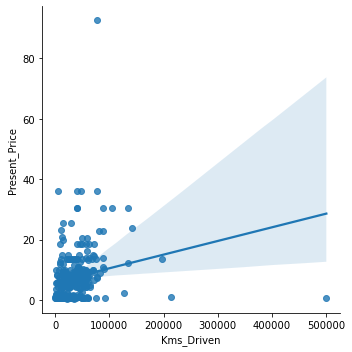

In [11]:
sns.lmplot(x="Kms_Driven", y = "Present_Price", data = df)

Plotting the correlation between the real price and the price the seller is using

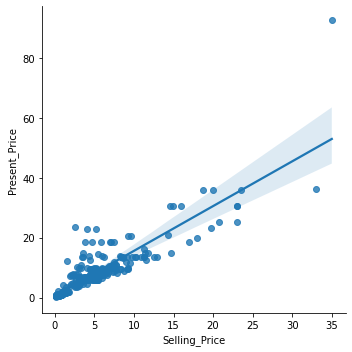

In [12]:
sns.lmplot(x="Selling_Price", y = "Present_Price", data = df)

Plotting the distribution of the price of the cars

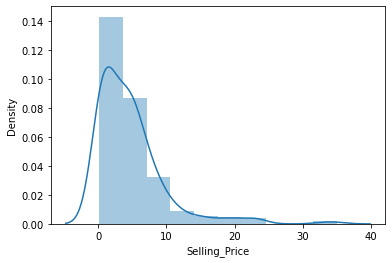

In [13]:
sns.distplot(df["Selling_Price"], kde = True, bins = 10)
plt.show()

Plotting the correlation of the data set, in this case the selling price has a strong positive relationship with the present price and a strong negative relationship with  if the car has an Owner

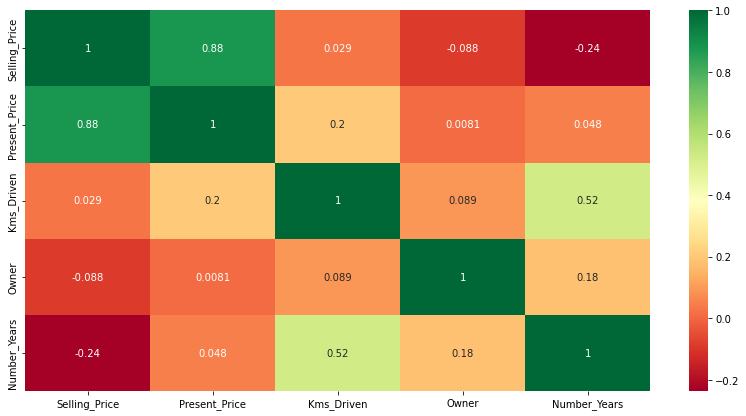

In [14]:
plt.figure(figsize=(14,7))
df_corr = df.corr()
sns.heatmap(df_corr, annot = True, cmap = "RdYlGn")
plt.show()

For the categorial variables creating dummies for a better functionality of the ML model

In [15]:
df = pd.get_dummies(df)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,10,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,11,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,7,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,13,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,10,0,1,0,1,0,0,1


# MACHINE LEARNING

Separating the dataset between the variable that we would like to predict againts the others

In [16]:
X = df.drop("Selling_Price", axis = 1)
y = df["Selling_Price"]

In [17]:
print(X.shape)
print(y.shape)

(301, 11)
(301,)


Splitting the dataset again but now with the training and testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

Training the model and then making predictions based on our previous model

In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train,y_train)

pre = lm.predict(X_test)

Plotting the model, between the predicted values and the real values

Text(0, 0.5, 'Predictions')

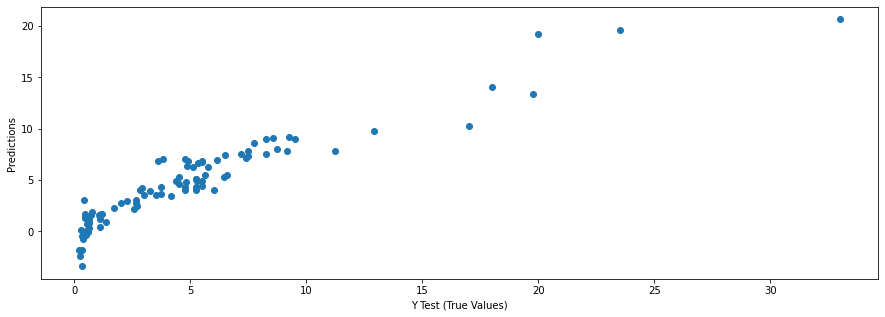

In [20]:
plt.figure(figsize=(15,5))
plt.scatter(y_test, pre)
plt.xlabel("Y Test (True Values)")
plt.ylabel("Predictions")

Getting the metrics of the model

In [21]:
from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(y_test, pre))
print("MSE: ", metrics.mean_squared_error(y_test, pre))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, pre)))

MAE:  1.2426713915033705
MSE:  4.432128265667616
RMSE:  2.1052620420431314


Getting the variance score between X and y

In [22]:
print("The model explain in a: " , round((metrics.explained_variance_score(y_test, pre)*100)),"% the y depending on X")

The model explain in a:  86 % the y depending on X


Getting the residuals (errors of the model) to know if they are distributed (if not, it could be an issue with any previous phase)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

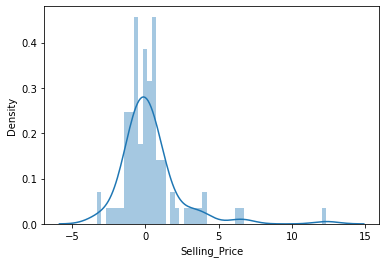

In [24]:
sns.distplot((y_test-pre), bins = 50)